In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import module
import matplotlib.colors as mcolors



In [30]:
df = pd.read_csv('booking_after_preprocess.csv')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number_of_adults          36285 non-null  int64  
 2   number_of_children        36285 non-null  int64  
 3   number_of_weekend_nights  36285 non-null  int64  
 4   number_of_week_nights     36285 non-null  int64  
 5   type_of_meal              36285 non-null  object 
 6   car_parking_space         36285 non-null  int64  
 7   room_type                 36285 non-null  object 
 8   lead_time                 36285 non-null  int64  
 9   market_segment_type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P_C                       36285 non-null  int64  
 12  P_not_C                   36285 non-null  int64  
 13  average_price             36285 non-null  float64
 14  specia

In [32]:
df = module.df_turn_datatype_to_categorical(df,['type_of_meal', 'room_type', 'market_segment_type', 'booking_status' ])

In [33]:
df['date_of_reservation'] = pd.to_datetime(df['date_of_reservation'], format='%Y-%m-%d') 

In [34]:
df.describe()

,number_of_adults,number_of_children,number_of_weekend_nights,number_of_week_nights,car_parking_space,lead_time,repeated,P_C,P_not_C,average_price,...,date_of_reservation,reservation_day,reservation_month,reservation_year,arrival_day,arrival_month,arrival_year,lead_month,number_of_total_nights,number_of_total_people
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,...,36285,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.104589,0.807386,2.192642,0.030977,85.239851,0.025630,0.014331,0.116246,103.301897,...,2018-05-24 13:18:35.866060544,15.592779,7.423811,2017.820284,15.851261,6.812292,2018.103789,2.428166,3.000028,1.949428
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2015-10-02 00:00:00,1.000000,1.000000,2015.000000,1.000000,1.000000,2016.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,...,2018-02-28 00:00:00,8.000000,5.000000,2018.000000,8.000000,3.000000,2018.000000,0.000000,2.000000,2.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,...,2018-06-12 00:00:00,16.000000,8.000000,2018.000000,16.000000,7.000000,2018.000000,1.000000,3.000000,2.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,...,2018-09-19 00:00:00,23.000000,10.000000,2018.000000,24.000000,10.000000,2018.000000,4.000000,4.000000,2.000000
max,4.000000,3.000000,5.000000,11.000000,1.000000,443.000000,1.000000,6.000000,30.000000,266.670000,...,2018-12-31 00:00:00,31.000000,12.000000,2018.000000,31.000000,12.000000,2020.000000,14.000000,16.000000,5.000000
std,0.518813,0.393843,0.861556,1.360289,0.173258,85.938796,0.158032,0.184308,1.159643,34.625453,...,NaN,8.734542,3.069935,0.384243,8.834707,3.637804,0.593694,2.823541,1.709298,0.645110


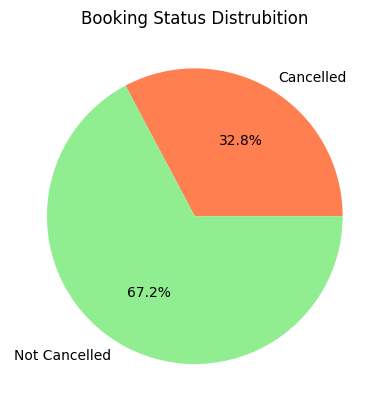

<Figure size 1200x800 with 0 Axes>

In [35]:
plt.pie(
        x=[
        df[df['booking_status'] == 'Canceled']['booking_status'].count(),
        df[df['booking_status'] == 'Not_Canceled']['booking_status'].count()],
        labels=['Cancelled', 'Not Cancelled'],
        autopct='%1.1f%%',
        colors=['coral', 'lightgreen'],
)
plt.title('Booking Status Distrubition')
plt.figure(figsize=(12, 8))
plt.show()
    

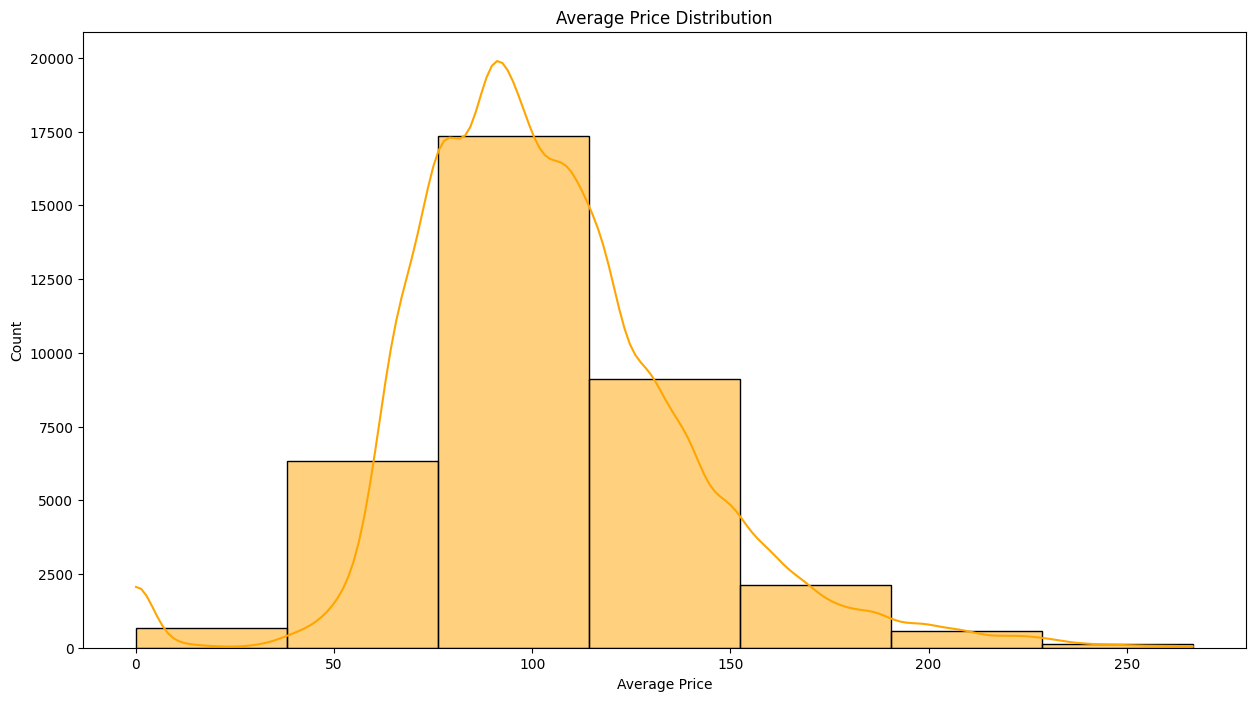

In [36]:
module.plot_hist(df,'Average Price Distribution', 'Average Price', 'average_price', 7, True, 'orange' )

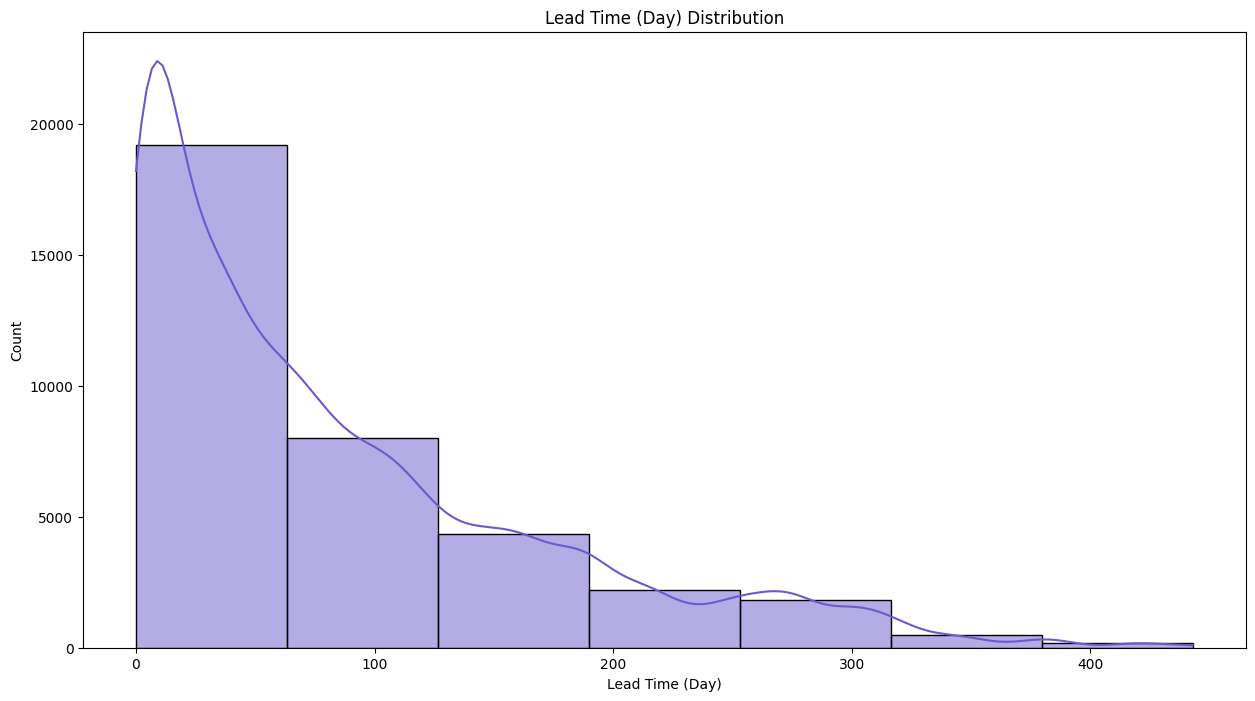

In [37]:
module.plot_hist(df,'Lead Time (Day) Distribution', 'Lead Time (Day)', 'lead_time', 7, True, 'slateblue' )

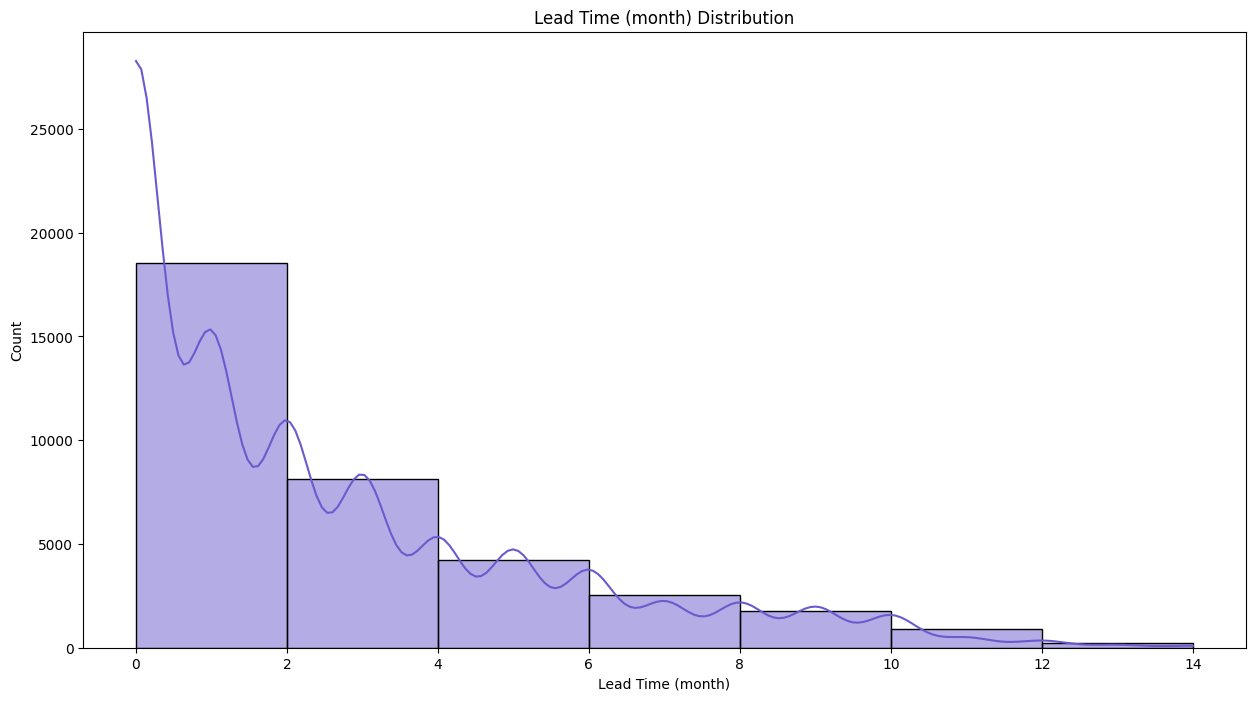

In [38]:
module.plot_hist(df,'Lead Time (month) Distribution', 'Lead Time (month)', 'lead_month', 7, True, 'slateblue' )

array([[<Axes: title={'center': 'number_of_adults'}>,
        <Axes: title={'center': 'number_of_children'}>],
       [<Axes: title={'center': 'number_of_total_people'}>, <Axes: >]],
      dtype=object)

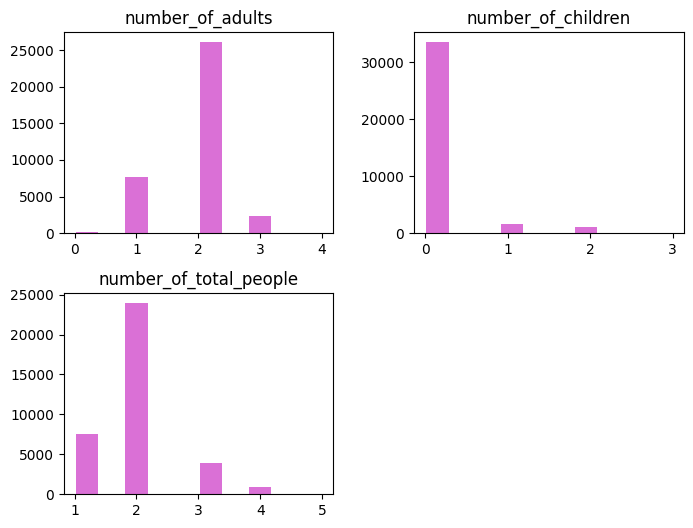

In [39]:
viz = df[['number_of_adults', 'number_of_children','number_of_total_people']]
viz.hist(color ='orchid',grid=False, figsize=(8,6), zorder=2, rwidth=0.9)


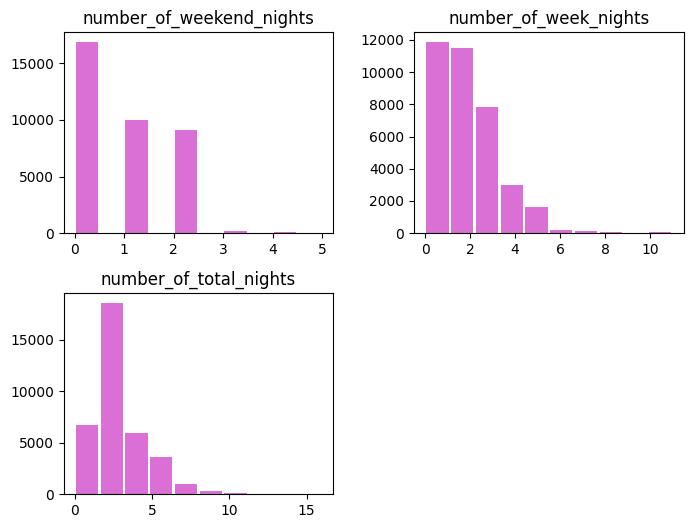

In [40]:
viz = df[['number_of_weekend_nights', 'number_of_week_nights','number_of_total_nights']]
viz.hist(color ='orchid',grid=False, figsize=(8,6), zorder=2, rwidth=0.9)
plt.show()

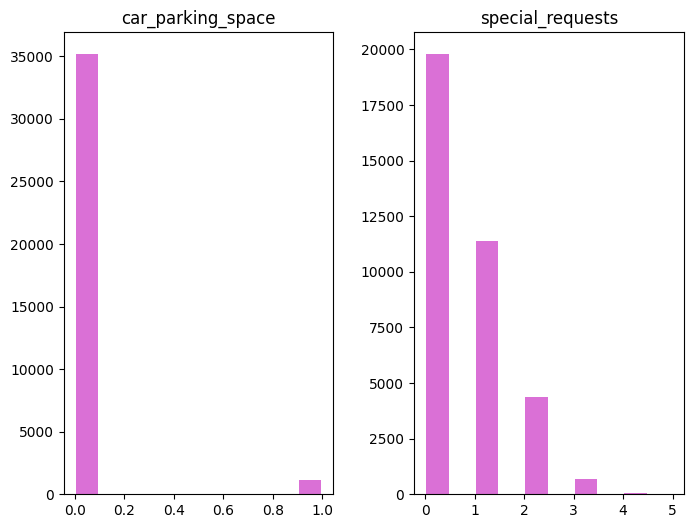

In [41]:
viz = df[['type_of_meal','car_parking_space', 'room_type','market_segment_type', 'special_requests',]]
viz.hist(color ='orchid',grid=False, figsize=(8,6), zorder=2, rwidth=0.9)
plt.show()

In [42]:
df.groupby(by='type_of_meal',observed=True)['type_of_meal'].count().to_frame()

,type_of_meal
type_of_meal,
Meal Plan 1,27842
Meal Plan 2,3306
Meal Plan 3,5
Not Selected,5132


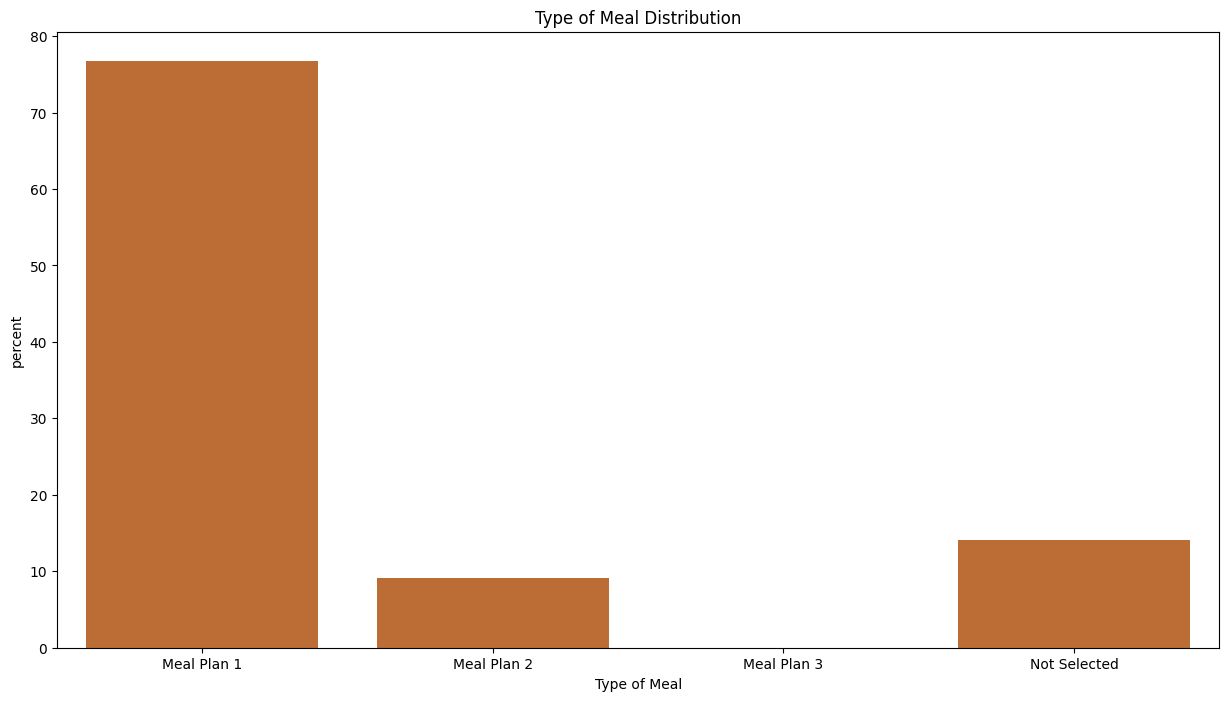

In [43]:
module.plot_count(df['type_of_meal'],'Type of Meal Distribution' , 'Type of Meal','chocolate')

In [44]:
df.groupby(['arrival_year'])['booking_status'].count()

arrival_year
2016        1
2017     4701
2018    23117
2019     8463
2020        3
Name: booking_status, dtype: int64

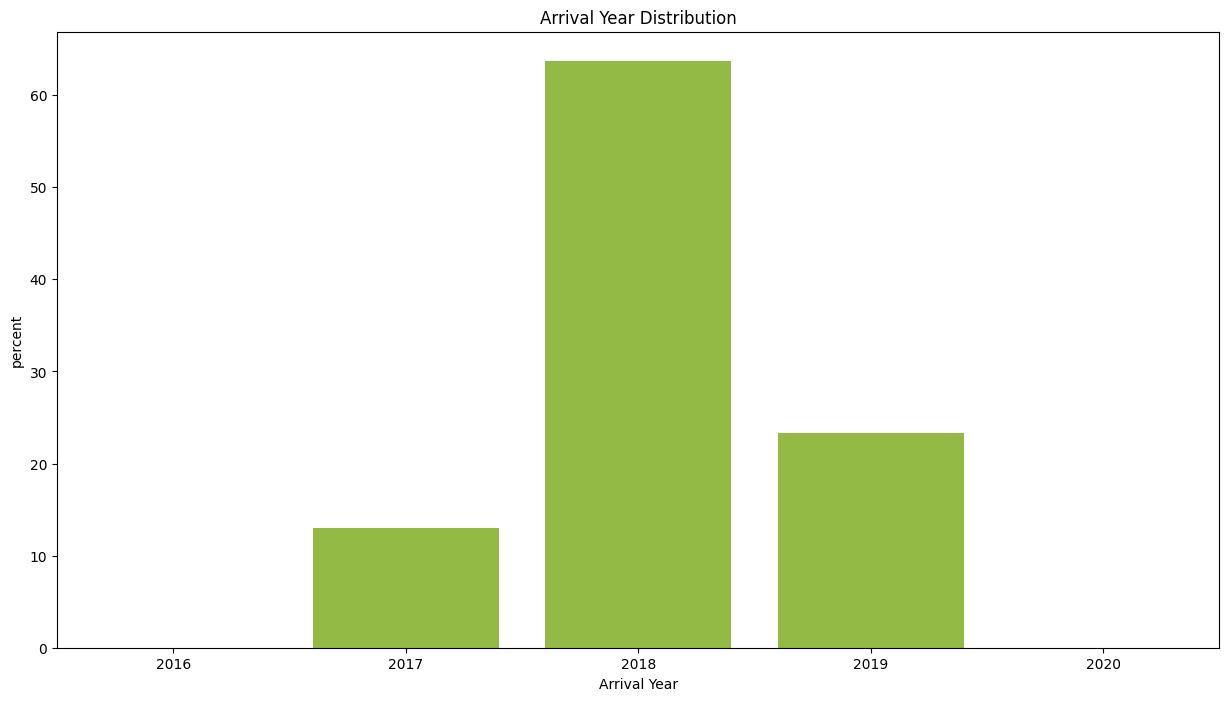

In [45]:
module.plot_count(df['arrival_year'],'Arrival Year Distribution' , 'Arrival Year','yellowgreen')

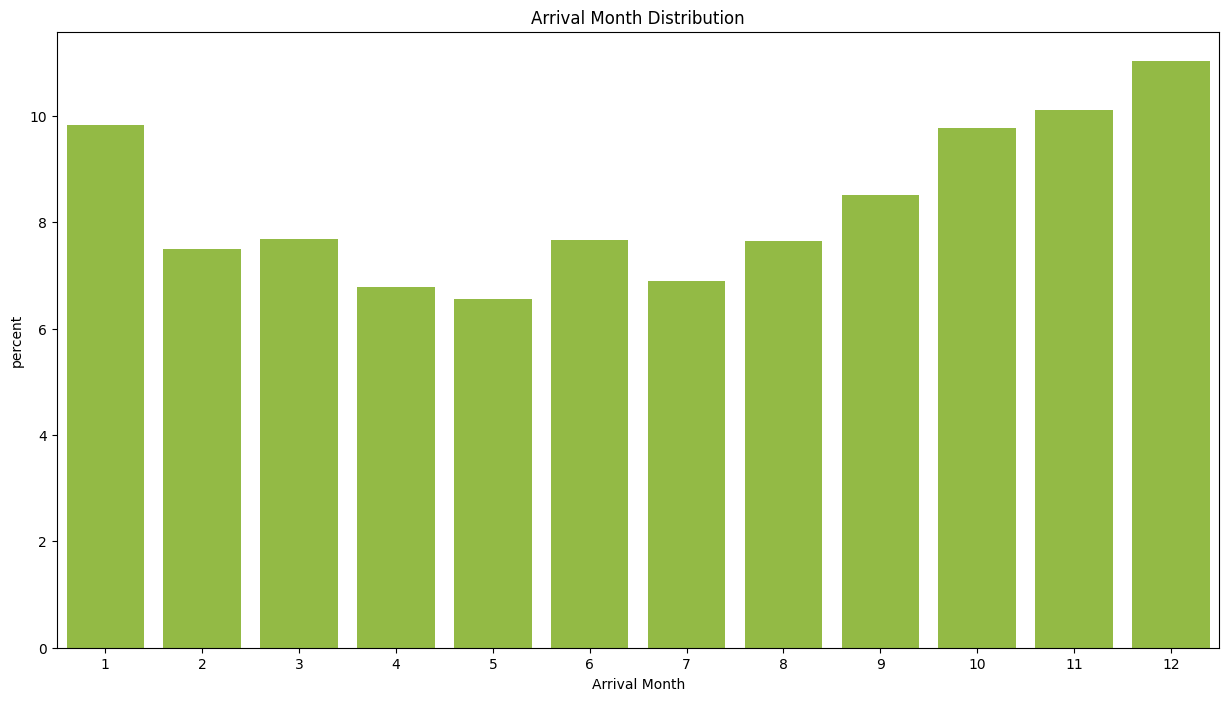

In [46]:
module.plot_count(df['arrival_month'],'Arrival Month Distribution' , 'Arrival Month','yellowgreen')

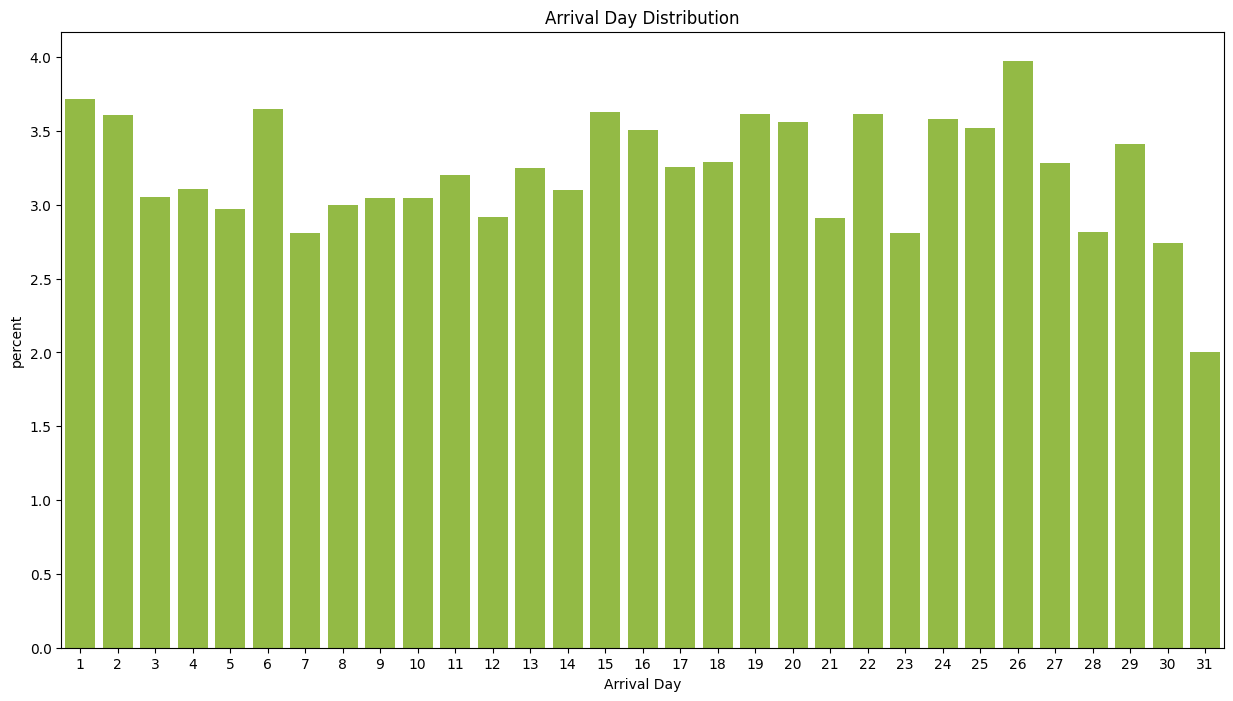

In [47]:
module.plot_count(df['arrival_day'],'Arrival Day Distribution' , 'Arrival Day','yellowgreen')

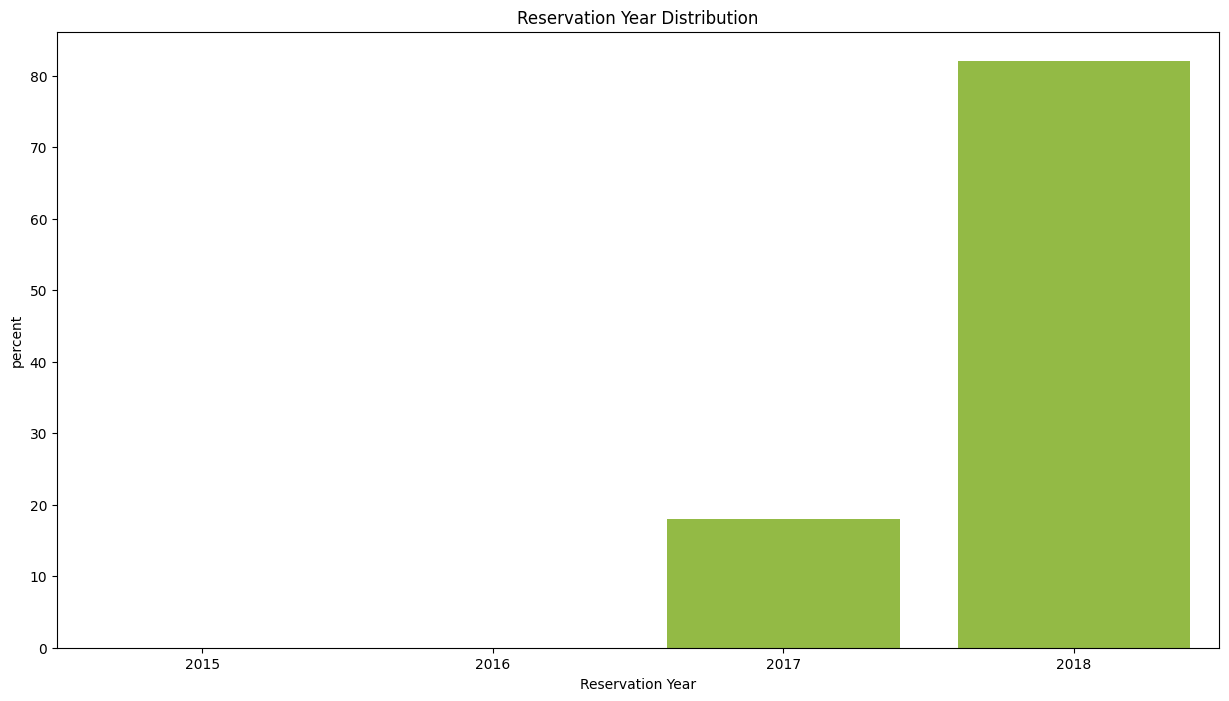

In [48]:
module.plot_count(df['reservation_year'],'Reservation Year Distribution' , 'Reservation Year','yellowgreen')

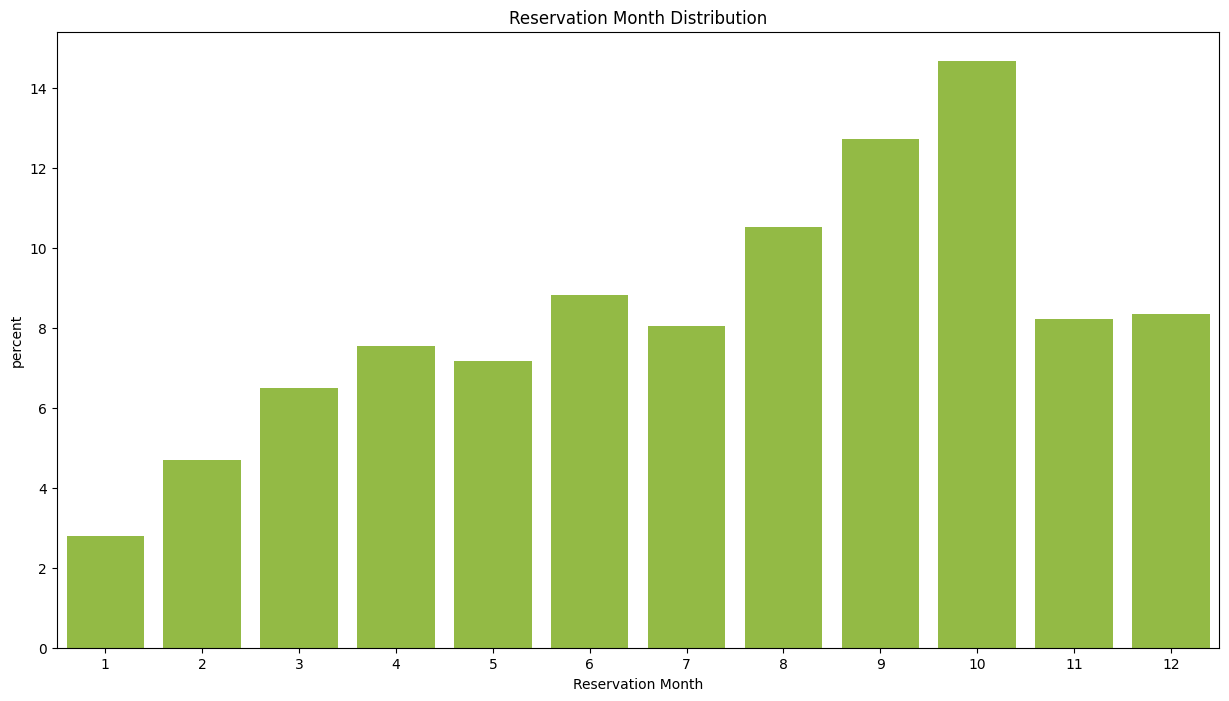

In [49]:
module.plot_count(df['reservation_month'],'Reservation Month Distribution' , 'Reservation Month','yellowgreen')

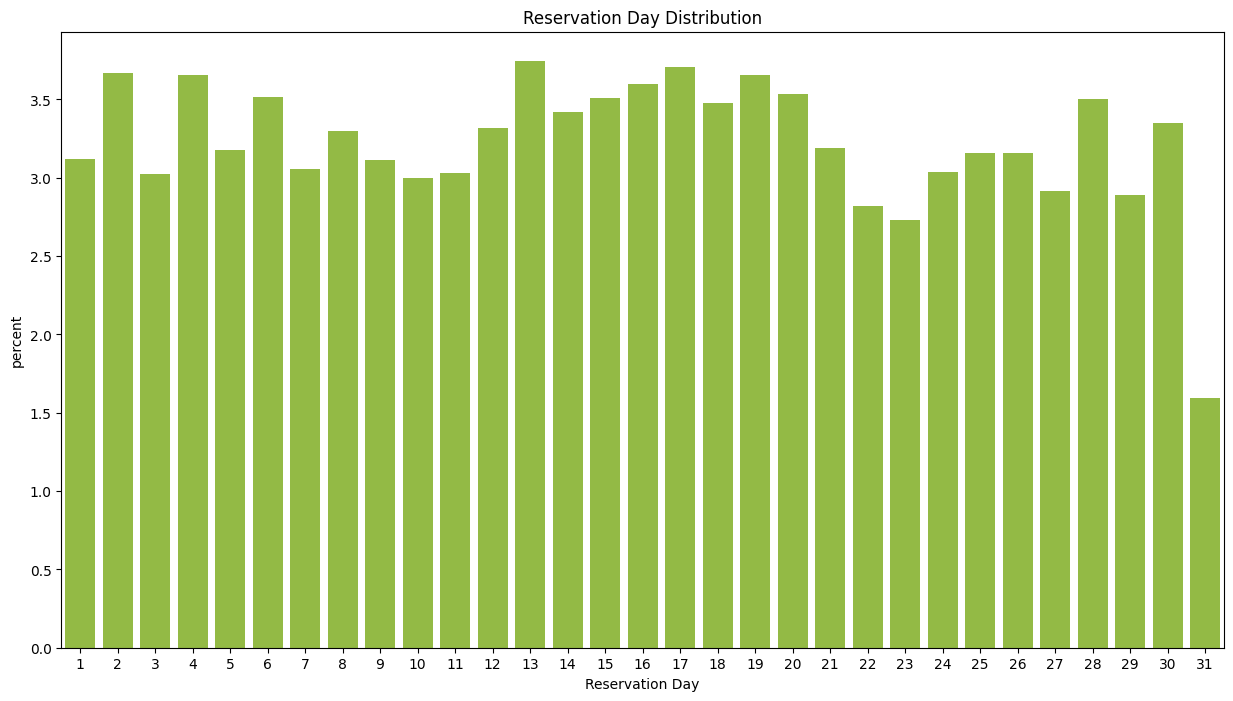

In [50]:
module.plot_count(df['reservation_day'],'Reservation Day Distribution' , 'Reservation Day','yellowgreen')

In [51]:
df.groupby('reservation_month')['lead_month'].mean()

reservation_month
1     0.865878
2     0.677419
3     1.172604
4     2.051516
5     2.410543
6     2.910084
7     3.439575
8     2.810386
9     2.803339
10    3.039662
11    2.002348
12    2.076439
Name: lead_month, dtype: float64

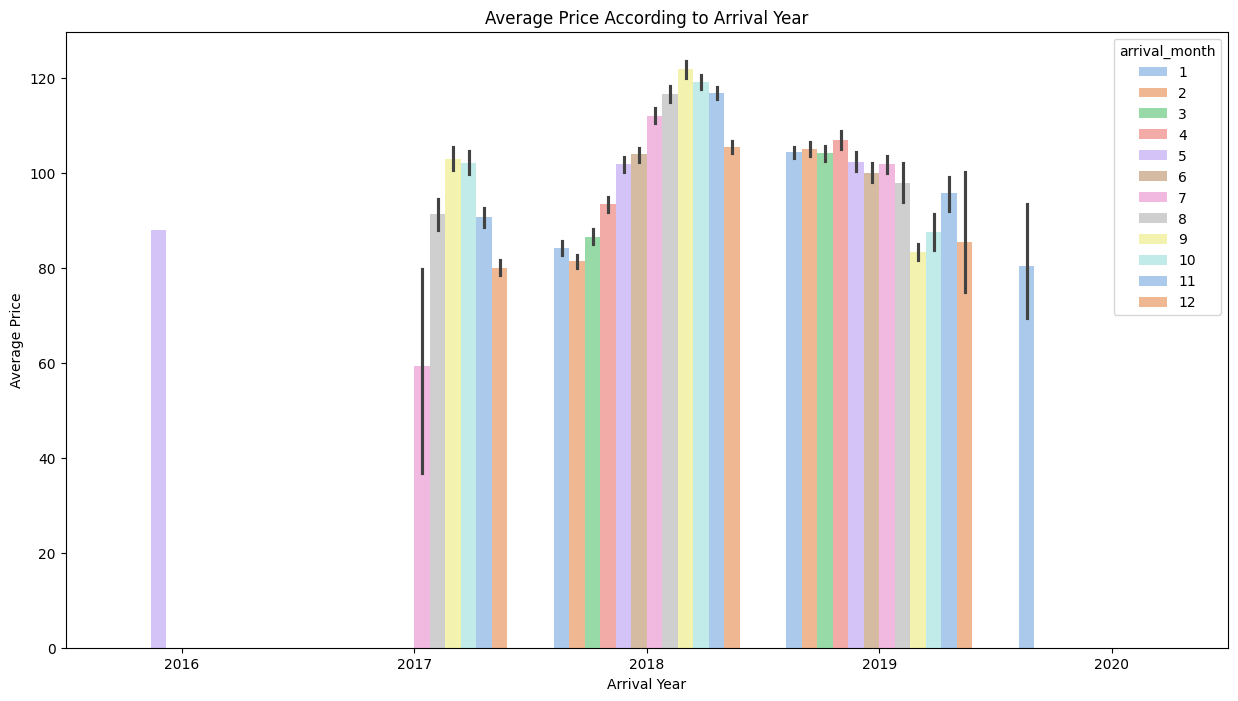

In [52]:
module.plot_bar(
        df,
        "arrival_year",
        "average_price",
        "Average Price According to Arrival Year",
        "Arrival Year",
        "Average Price",
        hue="arrival_month",
        )

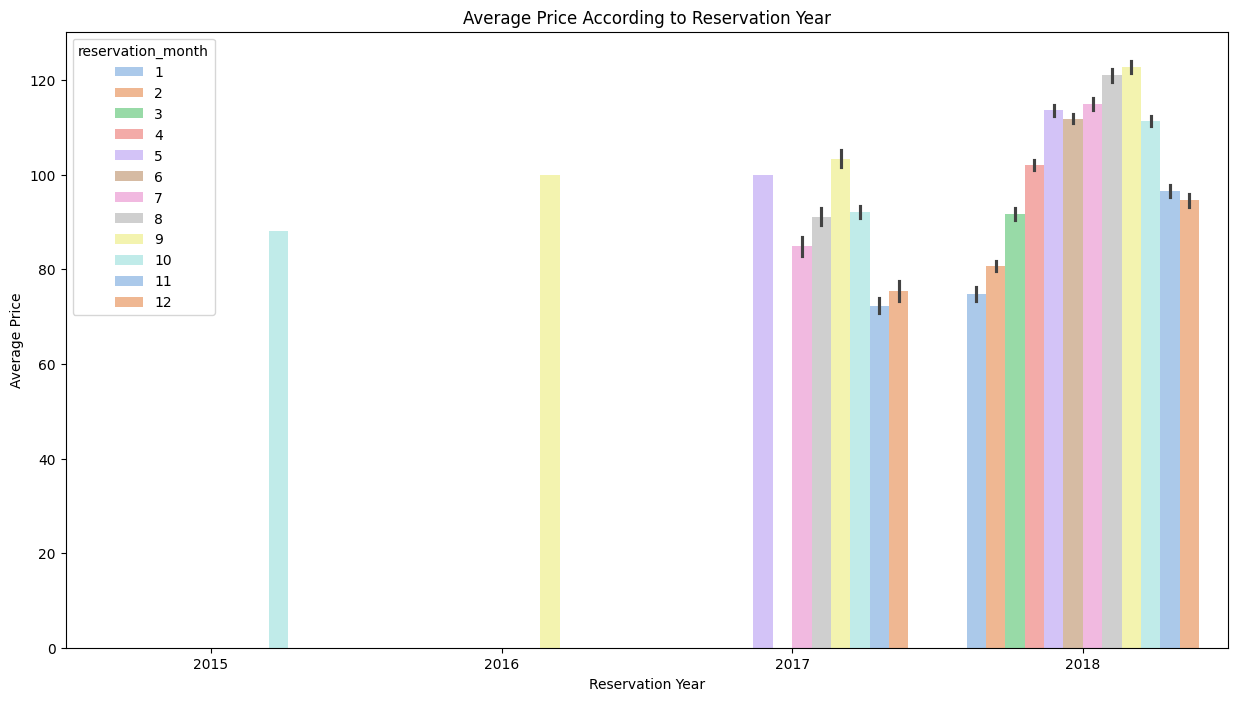

In [53]:
module.plot_bar(
        df,
        "reservation_year",
        "average_price",
        "Average Price According to Reservation Year",
        "Reservation Year",
        "Average Price",
        hue="reservation_month",
        )